# Name : Hassan Khan

# Task 03 : Titanic Survival Predictions

# Steps to Do:

# 1 : Download Titanic Dataset From Kaggle

Downlaod link : https://www.kaggle.com/datasets/brendan45774/test-file

# 2 : Load dataset using pandas

In [ ]:
import pandas as pd

# load dataset
dataset = pd.read_csv("/content/Titanic-Dataset.csv")

In [ ]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


# 3 : Handle Missing Values Appropriately

# 3.1 : Identify Missing Values

In [ ]:
# check missing value in each column
missing_value = dataset.isnull().sum()
print(missing_value)

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


There's a Three columns with missing value (Age, Fare, Cabin).


We can proceed with appropriate method to handle these missing values,

# 3.2 : Handling the Missing Values

Imputation (imp)


Central Tendency

In [ ]:
# impute the "Age" column with median value
median_age = dataset['Age'].median()
print(median_age)
dataset['Age'].fillna(median_age, inplace=True)

28.0


In [ ]:
# impute the "Fare" column with median value
median_fare = dataset['Fare'].median()
dataset['Fare'].fillna(median_fare, inplace=True)

Cabin colum have string value, we can't find a median value, So we fill Unknown instead of median.

In [ ]:
# Fill missing 'Cabin' values with 'Unknown'
dataset['Cabin'].fillna('Unknown', inplace=True)

# 4 : Embarked



In [ ]:
# First, calculate the most common embarkation point (mode)
most_common_embarked = dataset['Embarked'].mode()[0]
print(most_common_embarked)

# Fill missing values in 'Embarked' with the most common value
dataset['Embarked'].fillna(most_common_embarked, inplace=True)

S


# 3.3 : Verify the Missing Value

In [ ]:
# Check again for missing values
print(dataset.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


# 4 : Removing Duplicates Records

Find Duplicates

In [ ]:
# find duplicate record
print(dataset.duplicated().sum())

0


Remove Duplicate

In [ ]:
# Remove Duplicate
dataset.drop_duplicates(inplace = True)

We don't have any duplicate record, So i think 1 passenger is only 1 time present in the Titanic, so that's we don't have any duplicate

# 5 : Correct Data Types if Necessary

#Check Datatypes

In [ ]:
print(dataset.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#Adjust Data Types

In [ ]:
# Categorical columns ko 'category' type mein convert karna
dataset['Survived'] = dataset['Survived'].astype('category')
dataset['Pclass'] = dataset['Pclass'].astype('category')
dataset['Sex'] = dataset['Sex'].astype('category')
dataset['Embarked'] = dataset['Embarked'].astype('category')

# Numerical data ko sahi type mein convert karna
dataset['Age'] = pd.to_numeric(dataset['Age'], errors='coerce')
dataset['SibSp'] = dataset['SibSp'].astype(int)
dataset['Parch'] = dataset['Parch'].astype(int)
dataset['Fare'] = pd.to_numeric(dataset['Fare'], errors='coerce')

In [ ]:
# Show Data type after adjusting
print(dataset.dtypes)

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object


# 6 : Generate Summary Statistics For Numerical and Categorical Features

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [ ]:
# Summary statistics for numerical features
numerical_summary = dataset.describe()
numerical_summary

,PassengerId,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,29.503186,0.498854,0.385027,33.281086
std,378.020061,12.905241,1.041658,0.865560,51.741500
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
# Summary statistics for categorical features
categorical_summary = dataset.describe(include=['O'])
categorical_summary

,Name,Ticket,Cabin
count,1309,1309,1309
unique,1307,929,187
top,"Kelly, Mr. James",CA. 2343,Unknown
freq,2,11,1014


# 7 : Visualize Data Distributions Using Histograms and Box Plots

# Histogram

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

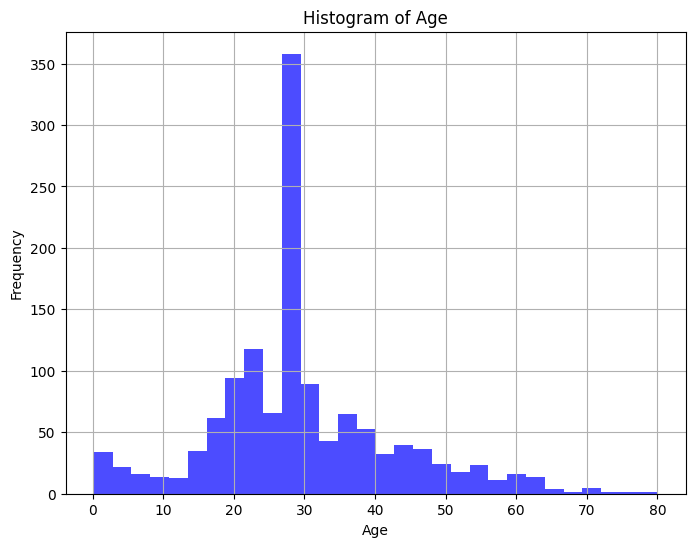

In [ ]:
# Histogram for Age
plt.figure(figsize=(8, 6))
plt.hist(dataset['Age'].dropna(), bins=30, alpha=0.7, color='blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

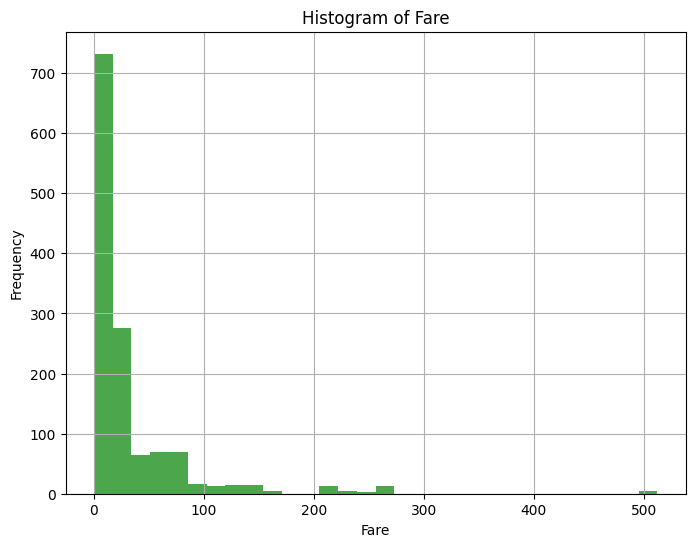

In [ ]:
# Histogram for Fare
plt.figure(figsize=(8, 6))
plt.hist(dataset['Fare'].dropna(), bins=30, alpha=0.7, color='green')
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

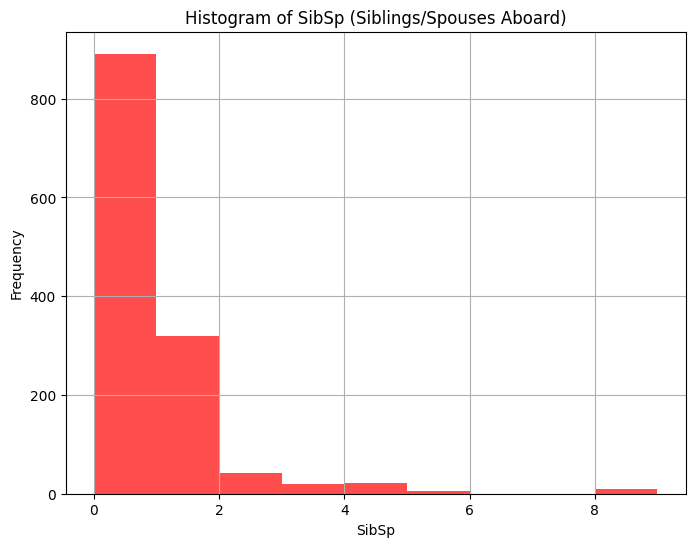

In [ ]:
# Histogram for Sibling / Spouse
plt.figure(figsize=(8, 6))
plt.hist(dataset['SibSp'].dropna(), bins=range(int(dataset['SibSp'].max())+2), alpha=0.7, color='red')
plt.title('Histogram of SibSp (Siblings/Spouses Aboard)')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

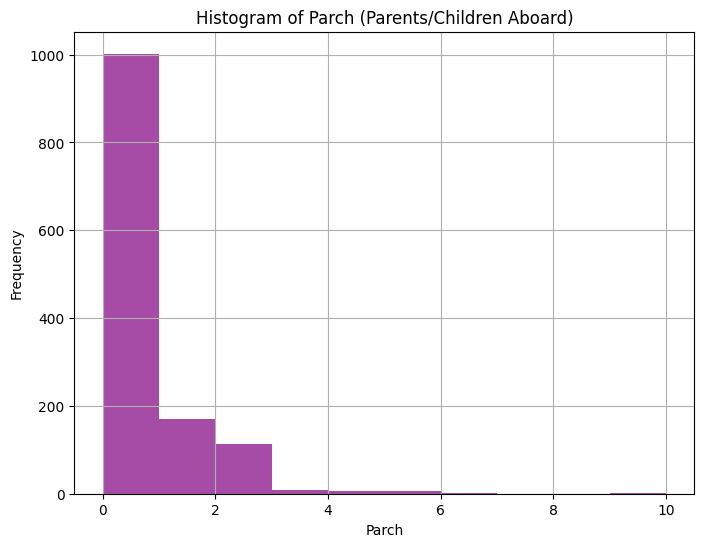

In [ ]:
# Histogram for Parch
plt.figure(figsize=(8, 6))
plt.hist(dataset['Parch'].dropna(), bins=range(int(dataset['Parch'].max())+2), alpha=0.7, color='purple')
plt.title('Histogram of Parch (Parents/Children Aboard)')
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box Plots

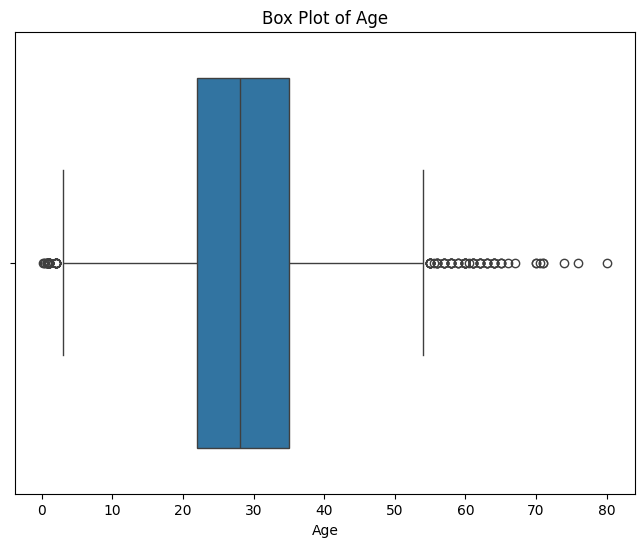

In [ ]:
# Box plot for Age
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

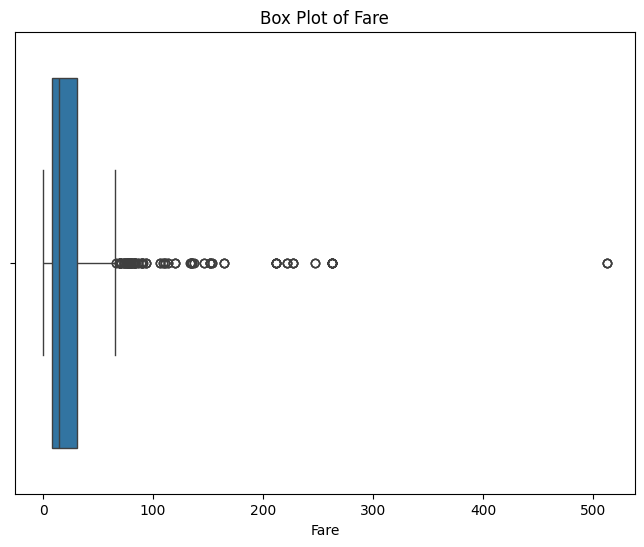

In [ ]:
# Box plot for Fare
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['Fare'])
plt.title('Box Plot of Fare')
plt.xlabel('Fare')
plt.show()


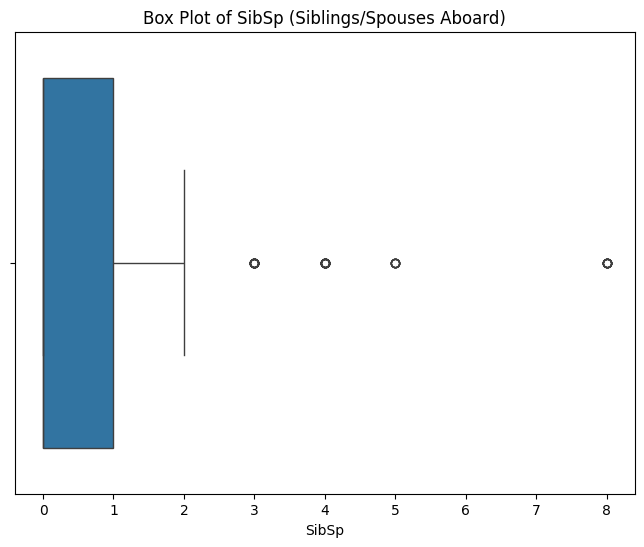

In [ ]:
# Box plot for SibSp
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['SibSp'])
plt.title('Box Plot of SibSp (Siblings/Spouses Aboard)')
plt.xlabel('SibSp')
plt.show()


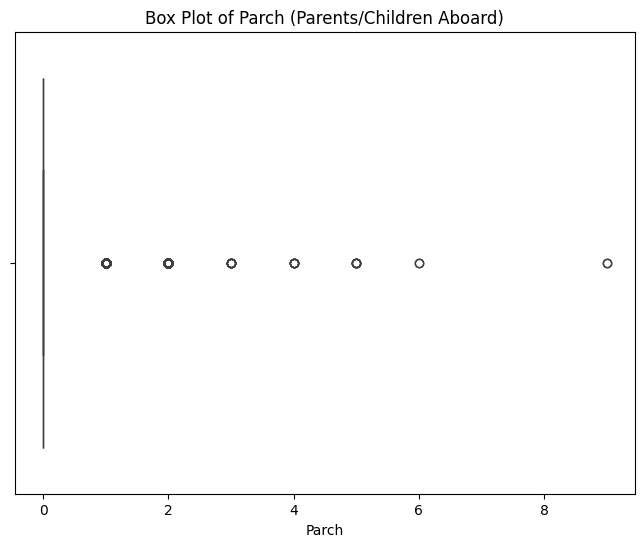

In [ ]:
# Box plot for Parch
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['Parch'])
plt.title('Box Plot of Parch (Parents/Children Aboard)')
plt.xlabel('Parch')
plt.show()


# Count Plot For Categorical Data

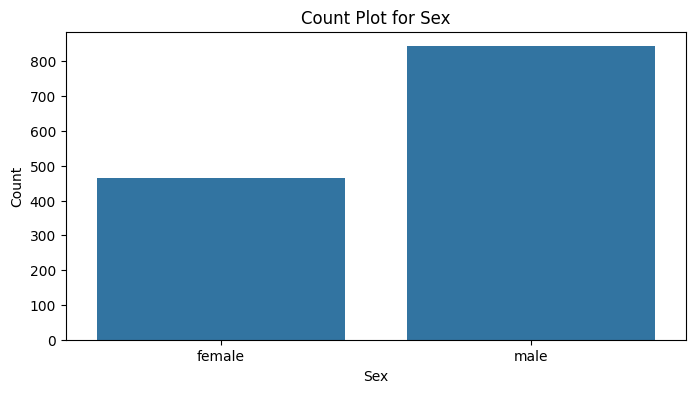

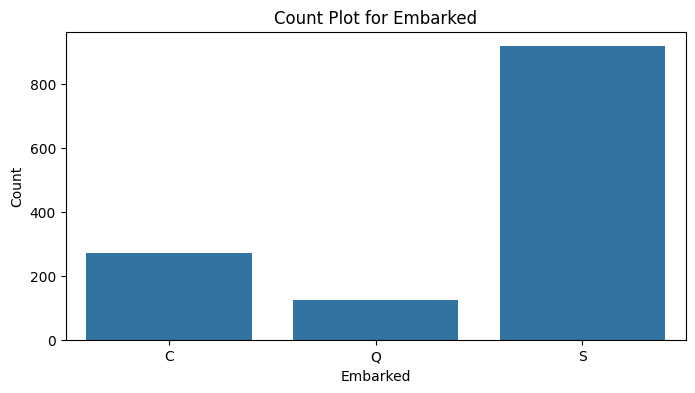

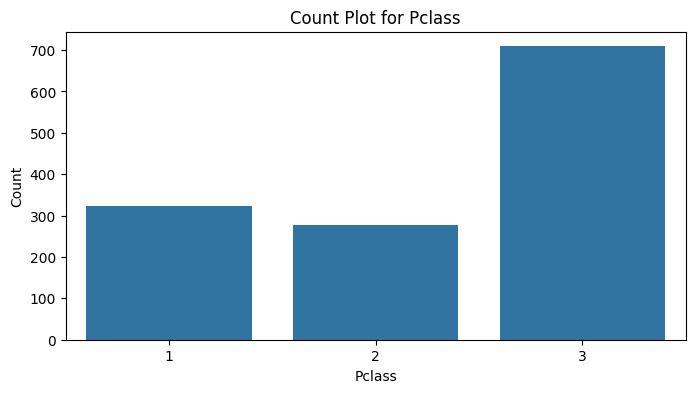

In [ ]:
# For Categorical Data: Visualizing distribution using count plots
categorical_features = ['Sex', 'Embarked', 'Pclass']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dataset, x=feature)
    plt.title(f'Count Plot for {feature}')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.show()


# 8 : Explore Relationships Between Features Using Scatter Plots.

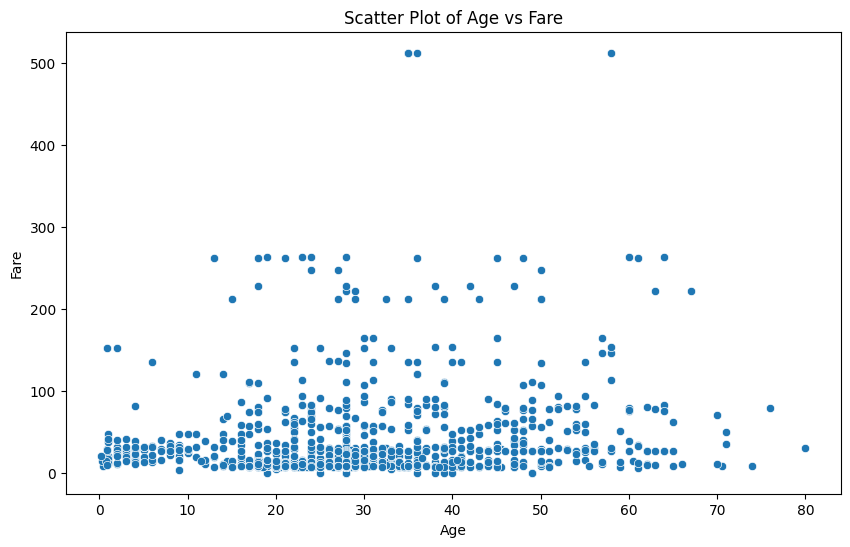

In [ ]:
# Scatter plot for Age vs Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=dataset)
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

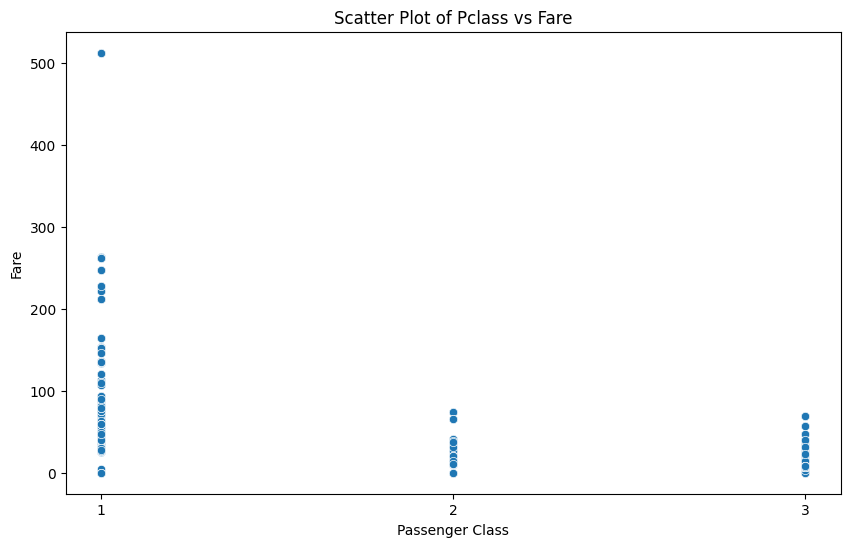

In [ ]:
# Scatter plot for Pclass vs Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pclass', y='Fare', data=dataset)
plt.title('Scatter Plot of Pclass vs Fare')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.xticks([1, 2, 3])
plt.show()

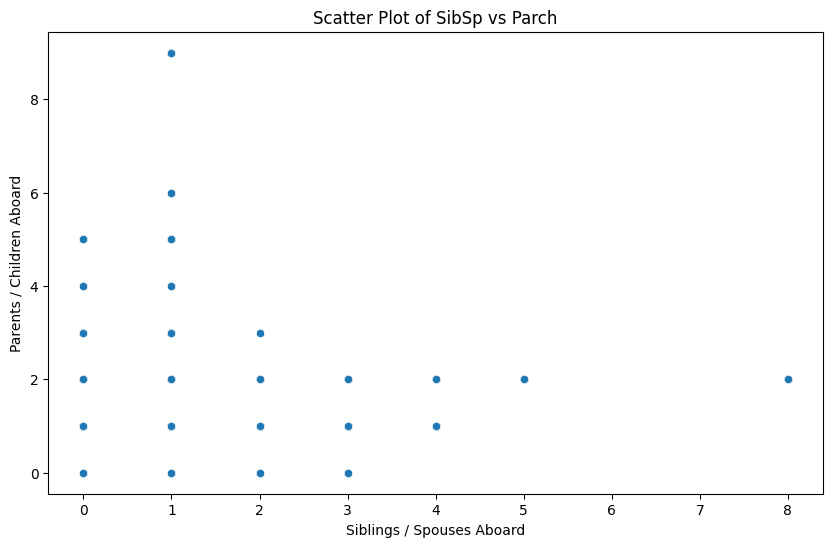

In [ ]:
# Scatter plot for SibSp vs Parch
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SibSp', y='Parch', data=dataset)
plt.title('Scatter Plot of SibSp vs Parch')
plt.xlabel('Siblings / Spouses Aboard')
plt.ylabel('Parents / Children Aboard')
plt.show()

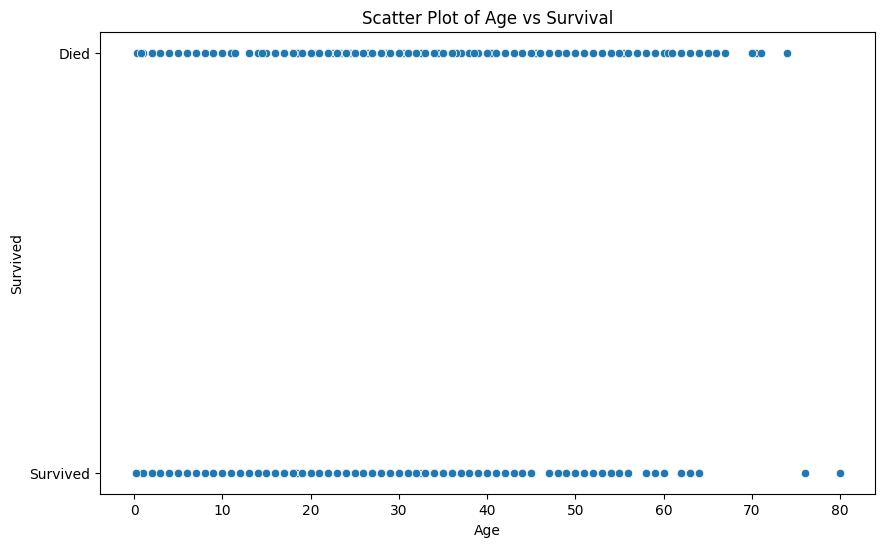

In [ ]:
# Scatter plot for Age vs Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Survived', data=dataset)
plt.title('Scatter Plot of Age vs Survival')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.yticks([0, 1], ['Died', 'Survived'])
plt.show()

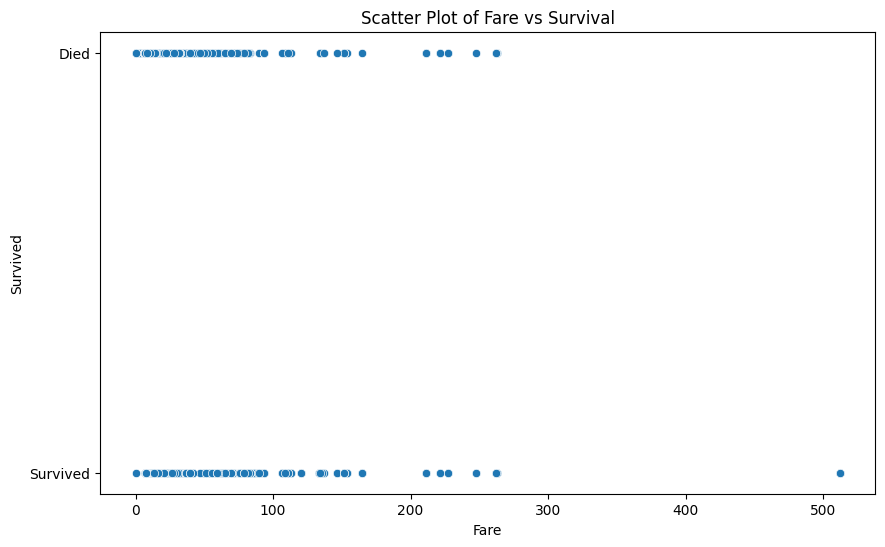

In [ ]:
# Scatter plot for Fare vs Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fare', y='Survived', data=dataset)
plt.title('Scatter Plot of Fare vs Survival')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.yticks([0, 1], ['Died', 'Survived'])
plt.show()

# 9 : Compute and Visualize The Correlation Matrix.

Compute The Correlation Matrix

In [ ]:
# Select only numerical columns, optionally including Pclass
numerical_df = dataset[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']]

# Compute the correlation matrix
corr_matrix = numerical_df.corr()
corr_matrix

,Age,SibSp,Parch,Fare,Pclass
Age,1.000000,-0.189972,-0.125851,0.178182,-0.377908
SibSp,-0.189972,1.000000,0.373587,0.160349,0.060832
Parch,-0.125851,0.373587,1.000000,0.221635,0.018322
Fare,0.178182,0.160349,0.221635,1.000000,-0.558683
Pclass,-0.377908,0.060832,0.018322,-0.558683,1.000000


Visualize the Correlation Matrix

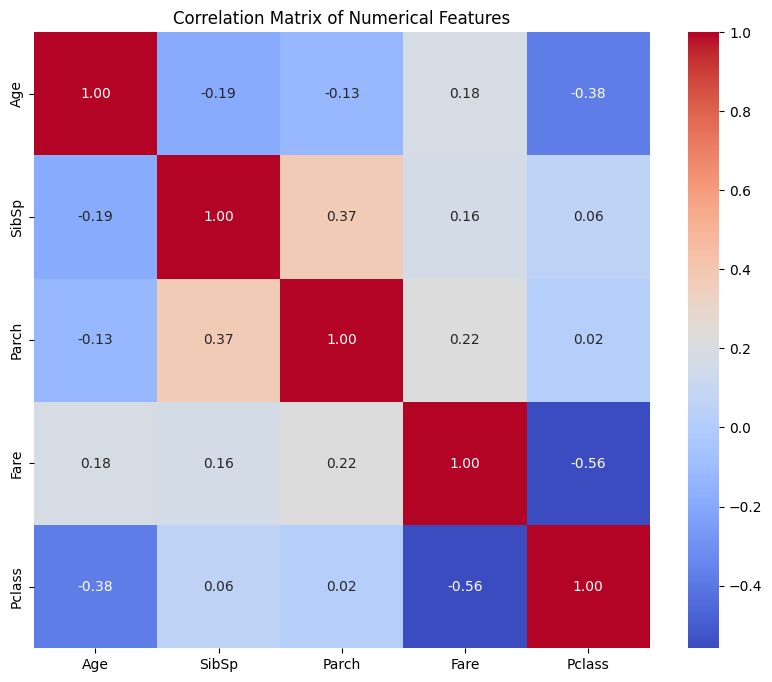

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 10 : Create New Features From Existing Data

1. Family Size :


Combining SibSp (number of siblings/spouses aboard) and Parch (number of parents/children aboard) to create a new feature that represents the total size of the family.

In [ ]:
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset['FamilySize'].value_counts()

FamilySize
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64

2. Is Alone :

A feature indicating whether the passenger is traveling alone. This can be derived from the FamilySize feature.

In [ ]:
# 1 if true, 0 otherwise
dataset['IsAlone'] = (dataset['FamilySize'] == 1).astype(int)
dataset['IsAlone'].value_counts()

IsAlone
1    790
0    519
Name: count, dtype: int64

3. Title :

Extracting the title from the name field, which can provide insights into social status, marital status, and profession, which may correlate with survival.

In [ ]:
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
dataset['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Mme           1
Don           1
Sir           1
Lady          1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

4. Fare Per Person :   

If traveling in a group, the fare might be split among the members. This feature adjusts the fare to reflect the amount each person effectively paid.

In [ ]:
dataset['FarePerPerson'] = dataset['Fare'] / dataset['FamilySize']
dataset['FarePerPerson'].value_counts()

FarePerPerson
13.000000    87
8.050000     69
7.750000     61
7.895800     49
10.500000    44
             ..
7.850000      1
15.033300     1
15.579200     1
28.537500     1
8.566667      1
Name: count, Length: 340, dtype: int64

5. Deck :

Extracting the deck letter from the cabin number, which could hint at the location on the ship and potentially the passenger’s survival chance.

In [ ]:
# Extracts the first character of the Cabin string
dataset['Deck'] = dataset['Cabin'].str[0]
dataset['Deck'] = dataset['Deck'].fillna('M')
dataset['Deck'].value_counts()

Deck
U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

6. Age Group :

Creating categorical bins for age can simplify the model's task of finding patterns related to age groups

In [ ]:
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teen', 'Adult', 'Middle Age', 'Senior']
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)
dataset['AgeGroup'].value_counts()

AgeGroup
Adult         839
Middle Age    205
Teen          134
Child          91
Senior         39
Name: count, dtype: int64

# 11 : One-Hot Encode Categorical Variables

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,FarePerPerson,Deck,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2,0,Mr,3.62500,U,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs,35.64165,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,1,Miss,7.92500,U,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs,26.55000,C,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1,1,Mr,8.05000,U,Adult


In [ ]:
# List of categorical variables to one-hot encode
categorical_vars = ['Sex', 'Embarked', 'Title', 'Deck', 'Cabin']

In [ ]:
# Performing one-hot encoding
df_encoded = pd.get_dummies(dataset, columns=categorical_vars, drop_first=True)


In [ ]:
# Display the first few rows of the new DataFrame to verify changes
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,...,False,False,False,False,False,False,False,False,False,True


# 12 : Standardize Numerical Features.

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,FarePerPerson,Deck,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2,0,Mr,3.62500,U,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs,35.64165,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,1,Miss,7.92500,U,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs,26.55000,C,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1,1,Mr,8.05000,U,Adult


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# List of numerical features to standardize
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [ ]:
# Fit the scaler on the numerical features and transform them
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

In [ ]:
# Display the first few rows of the new DataFrame to verify changes
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,FarePerPerson,Deck,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.581628,0.481288,-0.445,A/5 21171,-0.503291,Unknown,S,0.073352,0,Mr,3.62500,U,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.658652,0.481288,-0.445,PC 17599,0.734744,C85,C,0.073352,0,Mrs,35.64165,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.271558,-0.479087,-0.445,STON/O2. 3101282,-0.490240,Unknown,S,-0.558346,1,Miss,7.92500,U,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.426099,0.481288,-0.445,113803,0.383183,C123,S,0.073352,0,Mrs,26.55000,C,Adult
4,5,0,3,"Allen, Mr. William Henry",male,0.426099,-0.479087,-0.445,373450,-0.487824,Unknown,S,-0.558346,1,Mr,8.05000,U,Adult


# 13 : Resampling Techniques

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
# Separate features and target
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Identify numeric columns
numeric_cols = X_train.select_dtypes(include=['number']).columns

In [ ]:
# Impute missing values for numeric columns only
imputer = SimpleImputer(strategy='mean')
X_train_numeric = imputer.fit_transform(X_train[numeric_cols])
X_test_numeric = imputer.transform(X_test[numeric_cols])

In [ ]:
# Convert numpy arrays back to DataFrame
X_train_numeric = pd.DataFrame(X_train_numeric, columns=numeric_cols)
X_test_numeric = pd.DataFrame(X_test_numeric, columns=numeric_cols)

In [ ]:
# Apply SMOTE to the numeric training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_numeric, y_train)

In [ ]:
# Display the new class distribution
print("Resampled training target class distribution:\n", y_train_resampled.value_counts())

Resampled training target class distribution:
 Survived
0    656
1    656
Name: count, dtype: int64


Apply SMOTE to balance the class distribution of the target variable, ensuring equal representation of both classes to prevent model bias towards the majority class.


# Task : 02

# Build and Evaluate a Machine Learning Model

Steps to Do:

# Import Required Dependencies

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Doing Some Operation bcz our data is not good

In [ ]:
# Drop 'Name' and 'Ticket' columns as they are not useful for modeling
df_encoded = df_encoded.drop(['Name', 'Ticket'], axis=1, errors='ignore')

# One-hot encode categorical variables
categorical_columns = df_encoded.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)

# drop unnecessary columns
dataset.drop(['Name', 'Ticket'], axis=1, inplace=True)


In [ ]:
# Splitting the data
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure both training and test sets have the same columns
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

In [ ]:
# Check data types to ensure all are numeric or boolean
print(X_train.dtypes)


PassengerId         int64
Pclass           category
Sex              category
Age               float64
SibSp             float64
Parch             float64
Fare              float64
Cabin              object
Embarked         category
FamilySize        float64
IsAlone             int64
Title              object
FarePerPerson     float64
Deck               object
AgeGroup         category
dtype: object


In [ ]:
# Drop columns with high cardinality or not useful for the model
X_train = X_train.drop(['Cabin', 'Ticket'], axis=1, errors='ignore')
X_test = X_test.drop(['Cabin', 'Ticket'], axis=1, errors='ignore')

# One-hot encode categorical variables
categorical_vars = ['Sex', 'Embarked', 'Title', 'Deck']  # Adjust based on your specific dataset columns
X_train = pd.get_dummies(X_train, columns=categorical_vars, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_vars, drop_first=True)

# Ensure both training and test sets have the same columns
X_train, X_test = X_train.align(X_test, join='inner', axis=1)  # Ensures both datasets have the same dummy columns


In [ ]:
# Check data types to ensure all are numeric or boolean
print(X_train.dtypes)


PassengerId         int64
Pclass           category
Age               float64
SibSp             float64
Parch             float64
Fare              float64
FamilySize        float64
IsAlone             int64
FarePerPerson     float64
AgeGroup         category
Sex_male             bool
Embarked_Q           bool
Embarked_S           bool
Title_Major          bool
Title_Master         bool
Title_Miss           bool
Title_Mlle           bool
Title_Mr             bool
Title_Mrs            bool
Title_Rev            bool
Deck_B               bool
Deck_C               bool
Deck_D               bool
Deck_E               bool
Deck_F               bool
Deck_G               bool
Deck_U               bool
dtype: object


In [ ]:
X_train['Pclass'] = X_train['Pclass'].astype(int)
X_test['Pclass'] = X_test['Pclass'].astype(int)


In [ ]:
# Example of manually assigning codes if AgeGroup is ordinal
age_group_mapping = {'Baby': 0, 'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
X_train['AgeGroup'] = X_train['AgeGroup'].map(age_group_mapping)
X_test['AgeGroup'] = X_test['AgeGroup'].map(age_group_mapping)


In [ ]:
X_train = pd.get_dummies(X_train, columns=['AgeGroup'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['AgeGroup'], drop_first=True)


In [ ]:
print(X_train.dtypes)


PassengerId        int64
Pclass             int64
Age              float64
SibSp            float64
Parch            float64
Fare             float64
FamilySize       float64
IsAlone            int64
FarePerPerson    float64
Sex_male            bool
Embarked_Q          bool
Embarked_S          bool
Title_Major         bool
Title_Master        bool
Title_Miss          bool
Title_Mlle          bool
Title_Mr            bool
Title_Mrs           bool
Title_Rev           bool
Deck_B              bool
Deck_C              bool
Deck_D              bool
Deck_E              bool
Deck_F              bool
Deck_G              bool
Deck_U              bool
AgeGroup_4.0        bool
AgeGroup_5.0        bool
dtype: object


# Initialize & Fit the Models

In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with a strategy (e.g., 'mean', 'median', 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the training and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Fit the models on the imputed training data
rf_model.fit(X_train_imputed, y_train)
svm_model.fit(X_train_imputed, y_train)

# Make predictions on the imputed test set
y_pred_rf = rf_model.predict(X_test_imputed)
y_pred_svm = svm_model.predict(X_test_imputed)


# Evaluation Of Models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

Evaluate the Random Forest model

In [ ]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_imputed)[:, 1])

In [ ]:
print(f"Random Forest Metrics:\nAccuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-score: {f1_rf:.2f}")
print(f"ROC AUC: {roc_auc_rf:.2f}\n")

Random Forest Metrics:
Accuracy: 0.87
Precision: 0.85
Recall: 0.82
F1-score: 0.83
ROC AUC: 0.92



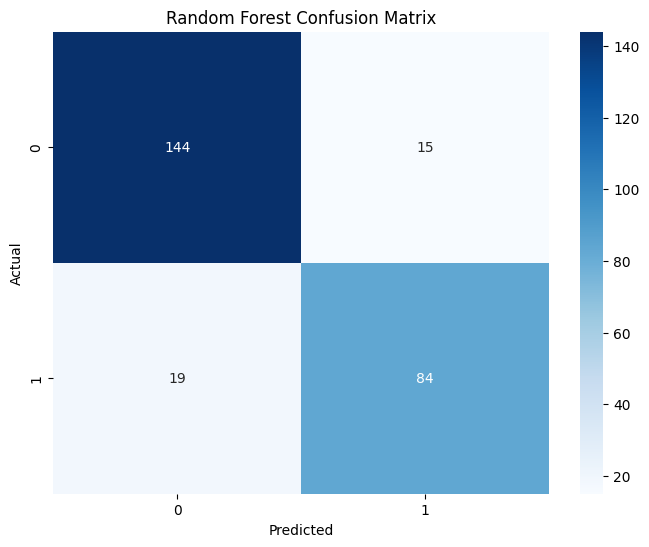

In [ ]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

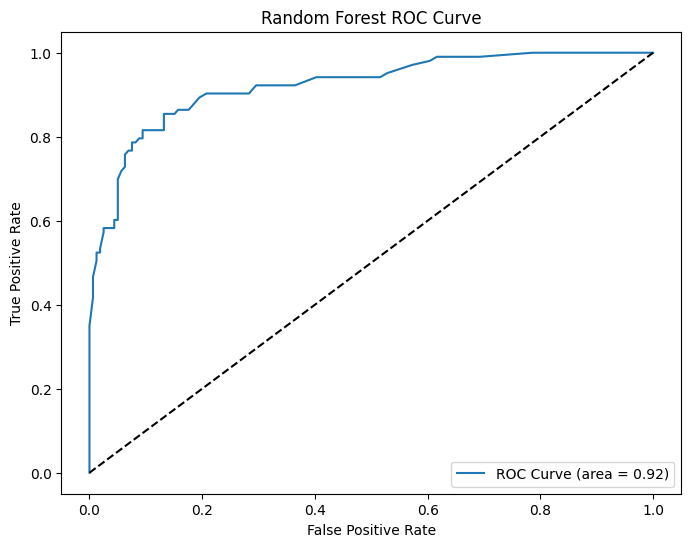

In [ ]:
# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_imputed)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='ROC Curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Evaluate the SVM model

In [ ]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, svm_model.predict_proba(X_test_imputed)[:, 1])

In [ ]:
print(f"SVM Metrics:\nAccuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1-score: {f1_svm:.2f}")
print(f"ROC AUC: {roc_auc_svm:.2f}")

SVM Metrics:
Accuracy: 0.63
Precision: 0.86
Recall: 0.06
F1-score: 0.11
ROC AUC: 0.60


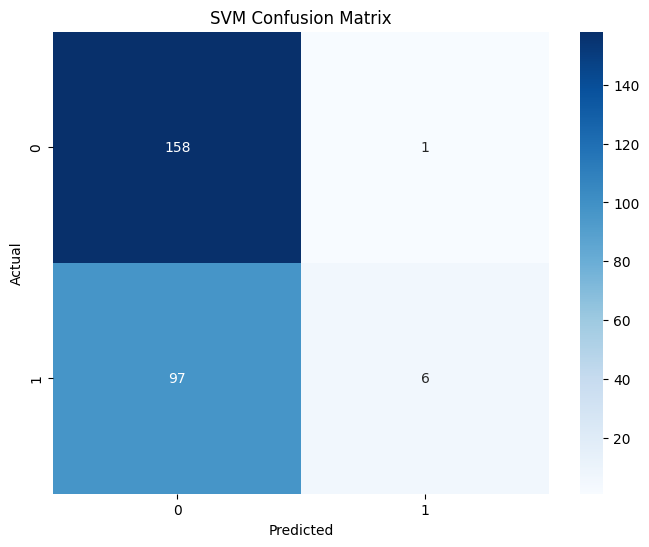

In [ ]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

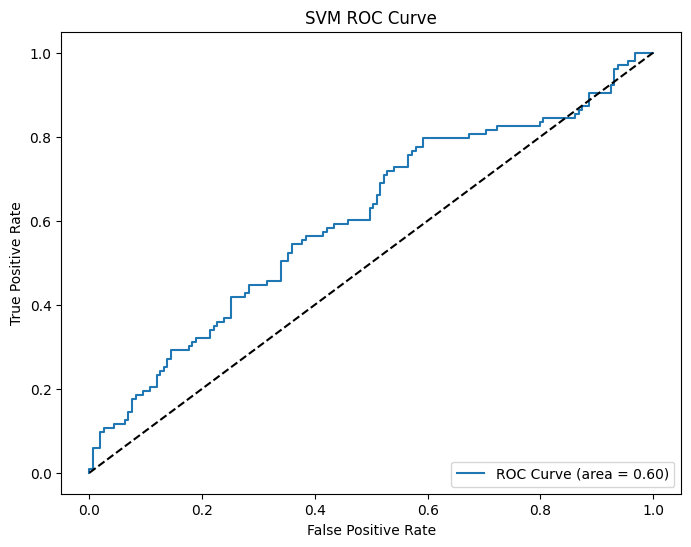

In [ ]:
# ROC Curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test_imputed)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label='ROC Curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()

Here is our task 3, where I used 2 Model RandomForest and SVM for our Titanic Dataset.

Accuracy on RandomForest: 0.87

Accuracy on SVM : 0.63